<a id="1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from yellowbrick.model_selection import FeatureImportances

<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Processed Dataset from previous Notebook</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [35]:
plasma = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/plasma(Specific Metabolics)_final.csv')
serum = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/serum(Specific Metabolics)_final2.csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

In [36]:
serum

,cholesterol,threonine,uric acid,3-hydroxybutanoic acid,5-hydroxynorvaline NIST,inosine,lactic acid,N-methylalanine,phenylalanine,quinic acid,aspartic acid,deoxypentitol,glutamic acid,malic acid,phenol,taurine,Class
0,0.12,-0.68,-0.94,2.30,-0.88,-0.57,0.09,-0.19,-0.34,-0.66,-0.41,-1.27,-0.21,0.47,-0.12,0.01,disease
1,1.16,-0.69,-1.17,-1.57,-1.05,-0.28,0.68,-1.14,0.30,-0.85,0.18,0.01,-0.48,-0.32,0.45,0.86,disease
2,1.34,-1.22,-0.15,0.89,-0.57,-0.52,1.63,-0.72,-0.86,-0.34,-0.14,0.57,0.75,-0.13,1.34,0.04,disease
3,1.05,-0.65,-0.37,-0.85,-0.54,-0.61,0.26,1.63,-0.05,-0.80,0.28,-0.04,-0.31,0.06,0.25,0.78,disease
4,-0.76,0.07,0.43,1.67,1.24,-0.60,-0.83,0.86,-0.04,2.06,-0.56,-0.62,-0.80,0.13,-1.47,-0.75,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.44,0.27,0.19,0.58,-0.41,0.23,-0.91,0.53,-0.12,-0.19,-0.61,0.46,0.21,-0.27,-0.76,-1.02,control
78,-1.02,0.62,1.36,-0.11,0.06,4.86,0.25,0.63,-0.23,-0.78,0.18,0.20,0.01,0.32,0.09,-0.49,control
79,-0.20,-0.85,0.66,-0.13,-0.16,0.41,-0.61,-0.83,0.07,0.39,-0.68,-0.24,-0.64,0.11,-0.47,-0.79,control
80,-0.46,0.75,-0.05,-0.95,-0.63,-0.67,-0.26,1.01,-0.85,-0.80,-0.42,-0.47,-0.49,-0.50,-1.72,-0.37,control


Keep labels as an numpy array.

In [37]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

<a id="3"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models</h1>

In [38]:
# !pip install lazypredict

In [39]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [40]:
# necessary functions
labels = np.reshape(plasma['Class'].to_numpy(), (82,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate

def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [41]:
accuracy = []
for k in [0, 2, 3, 4, 5]:
    
    if k==0:
        name = ['Plasma(Raw)']
        dfs = [plasma]
    
    else:
        name = [f'pca{k}_plasma(Exploratory)']
        vars()[f'pca{k}_plasma'] = pca_analysis(plasma, k)
        vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)
        dfs = [vars()[f'pca{k}_plasma_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(1):
           acc.append(result[i].loc['RidgeClassifier']['Balanced Accuracy'])
#                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

accuracy_df1 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
accuracy_df1

  7%|▋         | 2/29 [00:00<00:01, 19.97it/s]


Plasma(Raw): 0.9090909090909092


  7%|▋         | 2/29 [00:00<00:01, 18.52it/s]


pca2_plasma(Exploratory): 0.8181818181818181


 14%|█▍        | 4/29 [00:00<00:00, 31.19it/s]


pca3_plasma(Exploratory): 0.8181818181818181


  7%|▋         | 2/29 [00:00<00:01, 19.80it/s]


pca4_plasma(Exploratory): 0.8181818181818181


100%|██████████| 29/29 [00:00<00:00, 49.02it/s]


pca5_plasma(Exploratory): 0.8181818181818181


,Method,Accuracy
0,Plasma(Raw),0.9090909090909092
1,pca2_plasma(Exploratory),0.8181818181818181
2,pca3_plasma(Exploratory),0.8181818181818181
3,pca4_plasma(Exploratory),0.8181818181818181
4,pca5_plasma(Exploratory),0.8181818181818181


In [73]:
full_result = []
accuracy = []
for k in [0, 2, 3, 4, 5]:
    
    if k==0:
        name = ['Serum(Raw)']
        dfs = [serum]
    
    else:
        name = [f'pca{k}_serum(Exploratory)']
        
        vars()[f'pca{k}_serum'] = pca_analysis(serum, k)
        vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)
        
        dfs = [vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(1):
            acc.append(result[i].loc['XGBClassifier']['Balanced Accuracy'])
#                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
        full_result.append(result)

accuracy_df2 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
accuracy_df2

  7%|▋         | 2/29 [00:00<00:01, 19.41it/s]


Serum(Raw): 0.7803030303030303


  7%|▋         | 2/29 [00:00<00:01, 17.24it/s]


pca2_serum(Exploratory): 0.3939393939393939


  7%|▋         | 2/29 [00:00<00:01, 19.23it/s]


pca3_serum(Exploratory): 0.5681818181818181


  7%|▋         | 2/29 [00:00<00:01, 17.39it/s]


pca4_serum(Exploratory): 0.606060606060606


100%|██████████| 29/29 [00:00<00:00, 48.82it/s]


pca5_serum(Exploratory): 0.5606060606060606


,Method,Accuracy
0,Serum(Raw),0.7803030303030303
1,pca2_serum(Exploratory),0.3939393939393939
2,pca3_serum(Exploratory),0.5681818181818181
3,pca4_serum(Exploratory),0.606060606060606
4,pca5_serum(Exploratory),0.5606060606060606


In [48]:
accuracy_df1.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/ours_plasma.csv', index=False)
accuracy_df2.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/ours_serum.csv', index=False)

<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Masrur et al.</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [49]:
plasma = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\plasma_processed.csv')
serum = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\serum_processed.csv')
plasma.rename(columns = {'tocopherol alpha-': 'alpha-tocopherol', 'tocopherol gamma-': 'gamma-tocopherol'}, inplace = True)
serum.rename(columns = {'tocopherol alpha-': 'alpha-tocopherol', 'tocopherol gamma-': 'gamma-tocopherol'}, inplace = True)
plasma0 = plasma.drop(['Unnamed: 0'], axis=1)
serum0 = serum.drop(['Unnamed: 0'], axis=1)
serum0

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9582,279,82,61,357,122,24944,56,32,966,...,34239,54924,43,226295,11606,68,153849,194,811,disease
1,28847,161,78,84,205,258,10680,104,49,1076,...,20080,37597,203,96226,10188,71,110735,294,910,disease
2,13627,162,53,133,139,159,27201,160,80,1117,...,29191,28707,211,155596,16617,123,95509,253,804,disease
3,20758,6671,93,78,335,225,32347,242,59,304,...,16637,27873,71,191671,15214,84,96219,157,806,disease
4,15692,108,98,69,250,120,18357,60,25,1220,...,29820,30132,200,333019,20281,62,159853,188,1226,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,25194,108,106,32,127,185,23821,53,103,1334,...,34521,35970,92,262448,18757,54,108092,180,748,control
78,23525,83,140,261,167,181,12396,65,39,1408,...,28112,28014,104,310051,26134,50,134469,211,651,control
79,25154,418,90,307,284,100,11788,124,106,997,...,39591,37287,166,295930,21733,69,82547,457,749,control
80,12397,110,104,56,342,186,15214,47,129,924,...,29273,23742,1903,276190,17275,68,112921,1256,526,control


In [50]:
# standardize
for i in ['plasma', 'serum']:
    scl = StandardScaler().fit(vars()[i+'0'].iloc[:, :-1])
    stand = scl.transform(vars()[i+'0'].iloc[:, :-1])
    vars()[i] = pd.DataFrame(stand, columns = vars()[i+'0'].columns[:-1])
    vars()[i] = pd.concat([vars()[i], vars()[i+'0'].iloc[:, -1]], axis=1)

plasma.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.32,-0.19,-0.31,0.90,0.21,-0.67,0.73,-0.14,-0.40,-0.06,...,0.52,1.94,-0.42,0.38,-1.02,-0.69,1.88,-0.53,0.63,disease
1,0.70,-0.17,1.11,-0.83,-0.53,-0.19,-0.95,-0.22,-0.17,-1.30,...,-0.90,0.31,-0.18,-0.53,-1.24,0.99,-0.34,-0.08,-0.25,disease
2,-0.81,-0.20,-0.92,-1.27,-0.88,-1.01,1.01,-0.20,-0.14,0.02,...,0.83,-0.38,-0.03,-1.03,-0.23,1.02,-0.80,-0.27,-0.88,disease
3,-0.20,-0.17,-0.24,-0.47,-0.34,-0.37,1.93,-0.16,-0.16,-1.02,...,-1.11,-0.71,-0.42,-0.48,-0.48,0.50,-0.58,-0.35,-0.62,disease
4,-0.45,-0.15,-0.26,0.94,-0.14,0.10,0.17,-0.23,-0.37,0.19,...,0.01,-0.44,0.00,0.38,0.76,-0.85,1.97,-0.44,1.90,disease


In [51]:
plasma.dtypes

1_5-anhydroglucitol                float64
1-monostearin                      float64
2_3-dihydroxybutanoic acid NIST    float64
2_4-diaminobutyric acid            float64
2-deoxyerythritol                  float64
                                    ...   
uridine                            float64
valine                             float64
xylitol                            float64
xylose                             float64
Class                               object
Length: 159, dtype: object

<a id="4"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">PCA & t-SNE
</h1>

In [52]:
# necessary functions
labels = np.reshape(plasma['Class'].to_numpy(), (82,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate

def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

<a id="5"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Important Metabolites
</h1>

In [80]:
imp28 = ['3-phosphoglycerate', '5-hydroxynorvaline NIST', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'alpha-ketoglutarate', 'asparagine', 'aspartic acid', 'benzoic acid', 'citrulline', 'glutamine', 'hypoxanthine', 'inosine', 'lactamide', 'lactic acid', 'malic acid', 'maltose', 'maltotriose', 'methionine sulfoxide', 'nornicotine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'quinic acid', 'taurine', 'threonine', 'tryptophan', 'uric acid']
imp13 = ['5-hydroxynorvaline NIST', 'aspartic acid', 'cholesterol', 'deoxypentitol', 'glutamic acid', 'hypoxanthine', 'inosine', 'lactic acid', 'N-methylalanine', 'nornicotine', 'phenol', 'quinic acid', 'taurine']

<a id="6"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Prediction
</h1>

In [75]:
accuracy = []
for k in [0, 2, 3, 4, 5]:
    
    if k==0:
        name = ['Plasma(Raw)']
        dfs = [plasma[imp28]]
    
    else:
        name = [f'pca{k}_plasma(Exploratory)']
        vars()[f'pca{k}_plasma'] = pca_analysis(plasma[imp28], k)
        vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

        dfs = [vars()[f'pca{k}_plasma_df']]

    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(1):
            acc.append(result[i].loc['RidgeClassifier']['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

accuracy_df1 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
accuracy_df1

  7%|▋         | 2/29 [00:00<00:01, 19.42it/s]


Plasma(Raw): 0.8257575757575758


  3%|▎         | 1/29 [00:00<00:02,  9.52it/s]


pca2_plasma(Exploratory): 0.7727272727272727


  7%|▋         | 2/29 [00:00<00:01, 17.24it/s]


pca3_plasma(Exploratory): 0.7727272727272727


  3%|▎         | 1/29 [00:00<00:03,  8.00it/s]


pca4_plasma(Exploratory): 0.7727272727272727


100%|██████████| 29/29 [00:00<00:00, 44.29it/s]


pca5_plasma(Exploratory): 0.7727272727272727


,Method,Accuracy
0,Plasma(Raw),0.8257575757575758
1,pca2_plasma(Exploratory),0.7727272727272727
2,pca3_plasma(Exploratory),0.7727272727272727
3,pca4_plasma(Exploratory),0.7727272727272727
4,pca5_plasma(Exploratory),0.7727272727272727


In [63]:
# accuracy_df.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_2.csv', index=False)

In [82]:
accuracy = []
for k in [0, 2, 3, 4, 5]:
    
    if k==0:
        name = ['Serum(Raw)']
        dfs = [serum[imp13]]
    
    else:
        name = [f'pca{k}_serum(Exploratory)']
        vars()[f'pca{k}_serum'] = pca_analysis(serum[imp13], k)
        vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)
        dfs = [vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(1):
            acc.append(result[i].loc['XGBClassifier']['Balanced Accuracy'])
#                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
accuracy_df2 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
accuracy_df2

  7%|▋         | 2/29 [00:00<00:01, 18.35it/s]


Serum(Raw): 0.9090909090909092


  7%|▋         | 2/29 [00:00<00:01, 18.02it/s]


pca2_serum(Exploratory): 0.696969696969697


  7%|▋         | 2/29 [00:00<00:01, 17.86it/s]


pca3_serum(Exploratory): 0.7878787878787878


  7%|▋         | 2/29 [00:00<00:01, 17.86it/s]


pca4_serum(Exploratory): 0.6590909090909092


100%|██████████| 29/29 [00:00<00:00, 47.66it/s]


pca5_serum(Exploratory): 0.75


,Method,Accuracy
0,Serum(Raw),0.9090909090909092
1,pca2_serum(Exploratory),0.696969696969697
2,pca3_serum(Exploratory),0.7878787878787878
3,pca4_serum(Exploratory),0.6590909090909092
4,pca5_serum(Exploratory),0.75


In [65]:
accuracy_df1.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/prev_plasma.csv', index=False)
accuracy_df2.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/prev_serum.csv', index=False)

<a id="6"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Visualization
</h1>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


mashrur = pd.read_csv('prev_plasma.csv')
latest = pd.read_csv('ours_plasma.csv')

mashrur.head()

,Method,Accuracy
0,Plasma(Raw),0.83
1,pca2_plasma(Exploratory),0.77
2,pca3_plasma(Exploratory),0.77
3,pca4_plasma(Exploratory),0.77
4,pca5_plasma(Exploratory),0.77


In [67]:
renames = ['Before PCA', 'PCA2', 'PCA3', 'PCA4', 'PCA5']

for i in range(5):
    mashrur.loc[i, 'Method'] = renames[i]
    latest.loc[i, 'Method'] = renames[i]
mashrur.head()

,Method,Accuracy
0,Before PCA,0.83
1,PCA2,0.77
2,PCA3,0.77
3,PCA4,0.77
4,PCA5,0.77


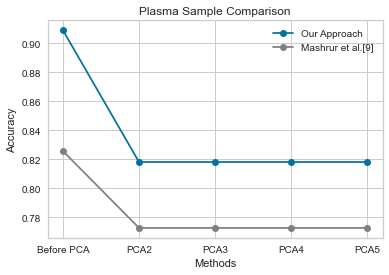

In [68]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

plt.plot(latest.Method, latest.Accuracy, 'o-', label='Our Approach')
plt.plot(mashrur.Method, mashrur.Accuracy, 'o-', label='Mashrur et al.[9]', color='gray')

plt.ylabel('Accuracy')
plt.xlabel('Methods')
plt.title('Plasma Sample Comparison')
plt.legend()
plt.show()

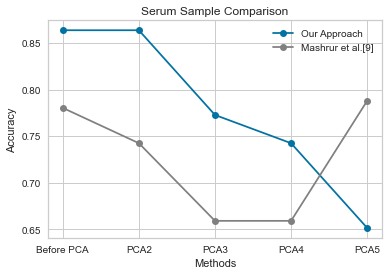

In [69]:
mashrur = pd.read_csv('prev_serum.csv')
latest = pd.read_csv('ours_serum.csv')

renames = ['Before PCA', 'PCA2', 'PCA3', 'PCA4', 'PCA5']

for i in range(5):
    mashrur.loc[i, 'Method'] = renames[i]
    latest.loc[i, 'Method'] = renames[i]

# plot both overlayed
plt.plot(latest.Method, latest.Accuracy, 'o-', label='Our Approach')
plt.plot(mashrur.Method, mashrur.Accuracy, 'o-', label='Mashrur et al.[9]', color='gray')
plt.ylabel('Accuracy')
plt.xlabel('Methods')
plt.title('Serum Sample Comparison')
plt.legend()
plt.show()